<a href="https://colab.research.google.com/github/annikarichardson2024/APIs/blob/main/FINAL_DESCRIPTIONS_%26_VISUALIZATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSS Midterm Project: Factors Affecting Capital Punishment Perception

Kiera Murphy, Connor Overbay, Alison Kerber, Annika Richardson, Taylor Toth

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Summary:

The question that we chose to focus on for the project was the topic of which demographics are highly likely to favor the death penalty. We found this topic to be uniquely interesting because it is a binary categorical variable but there are so many other factors that are present in the data set that are likely to have a strong impact on it. We decided to leverage the method of turning the capital punishment variable into a binary one where “1” represents an individual being in favor of capital punishment and a “0” represents an opposition to it. We then were able to conduct various forms of correlation analyses, and visualizations in the form of bar graphs and histograms that are further expanded upon below. Ultimately, the results of our analysis clarified that overall individuals favor capital punishment across the board for all religious affiliations being polled. Furthermore, all age groups being polled tend to favor capital punishment. In a similar way, most political affiliations also favor capital punishment in these cases. Below the distributions and visualizations of these results can be seen and further analyzed.


##Data:

Data for this study comes from the General Social Survey (GSS), a survey that is carried out through interviews with a cross-section of the US population. The interviews have taken place since 1972 and the organization conducting the survey has kept the methodology consistent over the duration of testing. Questions that remain on the interview are asked in the same manner every year as to not influence results and questions that are newly added are not asked retrospectively to past interviewees. This is a likely source of some null entries seen in the data set, as the question that we are using as a dependent variable was a more recent question. Removing the null values in this situation is valid, as the missing values were missing simply because there was not an opportunity to answer. Also, since we are not comparing change over time in this study, eliminating all early entries before the question appeared on the survey does not affect the results, and is essential for our analysis. Here are the relevant variables that we will be analyzing:

In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')
df.head()

,cappun,relig,age_category,polviews
0,NaN,christianity,3.0,"moderate, middle of the road"
1,favor,none/other,1.0,slightly liberal
2,favor,catholic,3.0,slightly conservative
3,NaN,protestant,1.0,liberal
4,oppose,catholic,1.0,slightly conservative


**Cappun:**
Our dependent variable measures whether individuals in the GSS favor or oppose the death penalty. The specific question asked in the survey was: “Do you favor or oppose the death penalty for persons convicted of murder?” Values containing missing data were changed to “nan.”


In [ ]:
df['cappun'].describe()

count     21938
unique        2
top       favor
freq      13729
Name: cappun, dtype: object

**Age:**
Each individual who took the survey entered their age. We cleaned the age variable so that it is grouped into individuals ages 18-29, 30-39, 40-49, 50-64, and 65-89. We chose these age clusters because they were given in the GSS Codebook. All the zero values for age were replaced with “nan.”


In [ ]:
df['age_category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 24130 entries, 0 to 24129
Series name: age_category
Non-Null Count  Dtype  
--------------  -----  
23539 non-null  float64
dtypes: float64(1)
memory usage: 188.6 KB


**Relig:**
Individuals were asked about their religious preference: “What is your religious preference? Is it Protestant, Catholic, Jewish, some other religion, or no religion?” The variable takes the values protestant, catholic,  jewish, christian,  buddhist, muslim/islam, hindu, native american, or none/other. Values containing missing data were changed to “nan.

In [ ]:
df['relig'].describe()

count          23883
unique             9
top       protestant
freq           11173
Name: relig, dtype: object

**Polviews:**
Individuals were asked “We hear a lot of talk these days about liberals and conservatives. I'm going to show you a seven-point scale on which the political views that people might hold are arranged from extremely liberal--point 1--to extremely conservative--point 7. Where would you place yourself on this scale?” The variable takes the values extremely conservative, conservative,  slightly conservative, moderate, slightly liberal, liberal, and extremely liberal. Values containing missing data were changed to “nan.”

In [ ]:
df['polviews'].describe()

count                            23262
unique                               7
top       moderate, middle of the road
freq                              8713
Name: polviews, dtype: object

##Results:

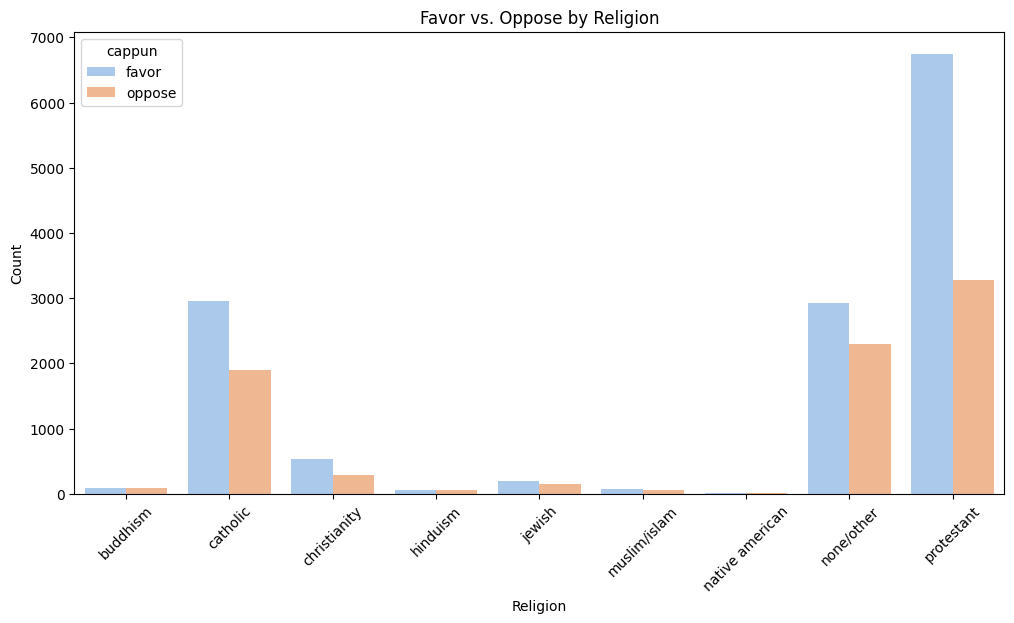

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df['cappun'], df['relig'])
ct_reset = ct.reset_index()
long_df = ct_reset.melt(id_vars='cappun', var_name='religion', value_name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x='religion', y='count', hue='cappun', palette='pastel')
plt.title('Favor vs. Oppose by Religion')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The histogram featured above demonstatres a trend in the overall data that those across religions typically are in favor of the death penalty rather than oppoosed. Though, there is something to be said about the counts in the native american and hinduism categories, where the counts for those who are in favor versus those who are against are very close. This could be explained by there being a very low number of people in this dataset that make up those religions, so this data could not be very representative of those religious populations as a whole. Looking at the religions with higher counts, those who identified as protestant and in favor of the death pentaly made up 71.94% of the data set, those catholic 69.87%, and those reported having no religion or other 61.43%. Overall, the categories of protestant, catholic, and none/other had signifigantly more people than the other religions, which is why there is a higher count of responses to evaluate when comapres to the others.

In [ ]:
counts = pd.crosstab(df['relig'], df['age_category'])
counts_reset = counts.reset_index()

crosstab_favor = pd.crosstab(index=[df['age_category'], df[df['cappun'] == 'favor']['relig']], columns='count')
crosstab_oppose = pd.crosstab(index=[df['age_category'], df[df['cappun'] == 'oppose']['relig']], columns='count')
result = pd.concat([crosstab_favor, crosstab_oppose], axis=1, keys=['favor', 'oppose'])
print(result)


                               favor  oppose
col_0                          count   count
age_category relig                          
1.0          buddhism           17.0     8.0
             catholic          423.0   312.0
             christianity       88.0    69.0
             hinduism           10.0    11.0
             jewish             14.0    21.0
             muslim/islam       13.0    14.0
             native american     4.0     1.0
             none/other        683.0   587.0
             protestant        717.0   450.0
2.0          buddhism           17.0    17.0
             catholic          512.0   310.0
             christianity      135.0    80.0
             hinduism           17.0    15.0
             jewish             21.0    28.0
             muslim/islam       22.0    17.0
             none/other        682.0   565.0
             protestant        999.0   514.0
3.0          buddhism           14.0    21.0
             catholic          519.0   308.0
          

The summary table above shows the counts within each category, separated by religion, of those who chose to be in favor or opposed to the dealth penalty.

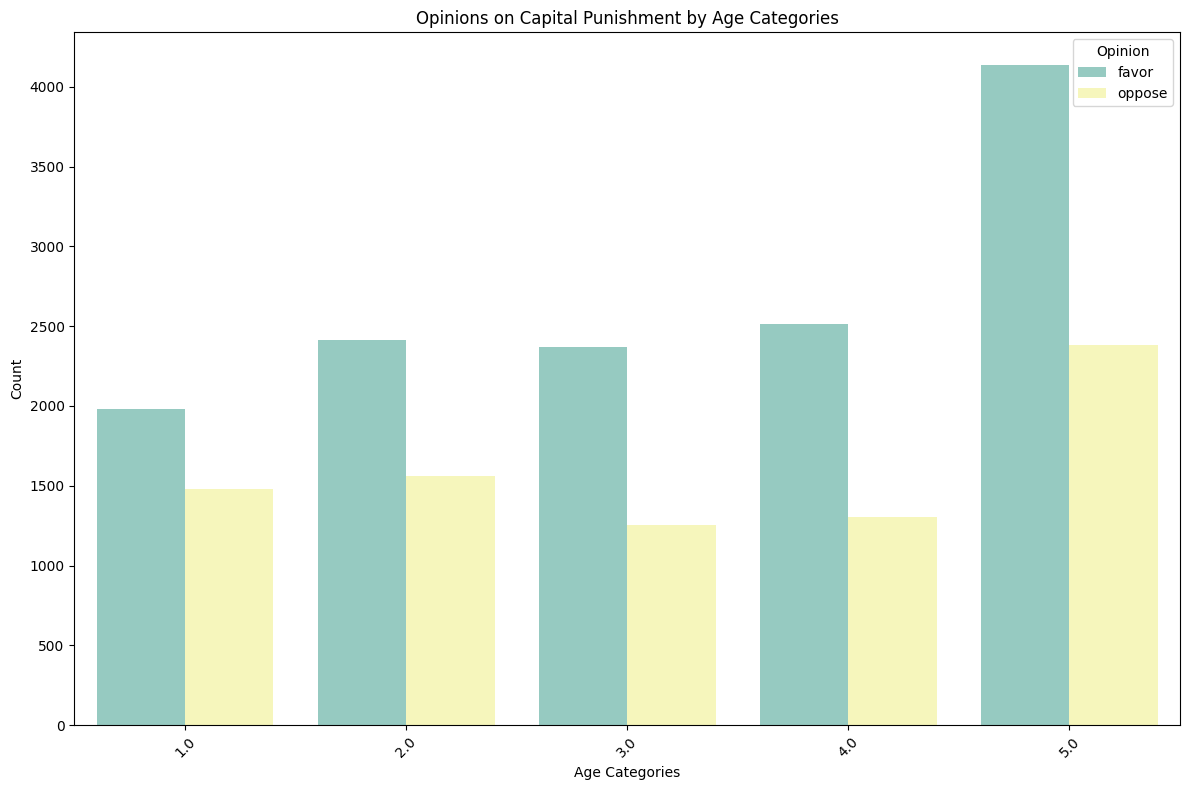

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_category', hue='cappun', hue_order=['favor', 'oppose'], palette='Set3')
plt.title('Opinions on Capital Punishment by Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Opinion', loc='upper right')
plt.tight_layout()
plt.show()

The histogram above demonstrates a trend in the data across age groups, that atleast 65% of people on those age groups are in favor of the death pentaly rather than opposed. While all the age categories were close in ratio of in favor or against, those in the 3rd age category, representing those between 40-49, had the highest percentage of those in favor with 70.90%, and the 4th age category representing those 50-64 making up 70.34% in favor. The first age category, which represents those aged 18-29 had the lowest ratio of those in favor of the dealth penalty, with 66.80% of them being in favor. There is something to be said about the large amount of in favor responses in the fifth age category, which represents ages 60-89. Due to this age category spanning over a larger range, and the in favor option generally being more popular, it makes sense to see a larger amount responses in that age category generally, still in line with the other ratios, having 69.63% of respondents be in favor of the death pentaly.

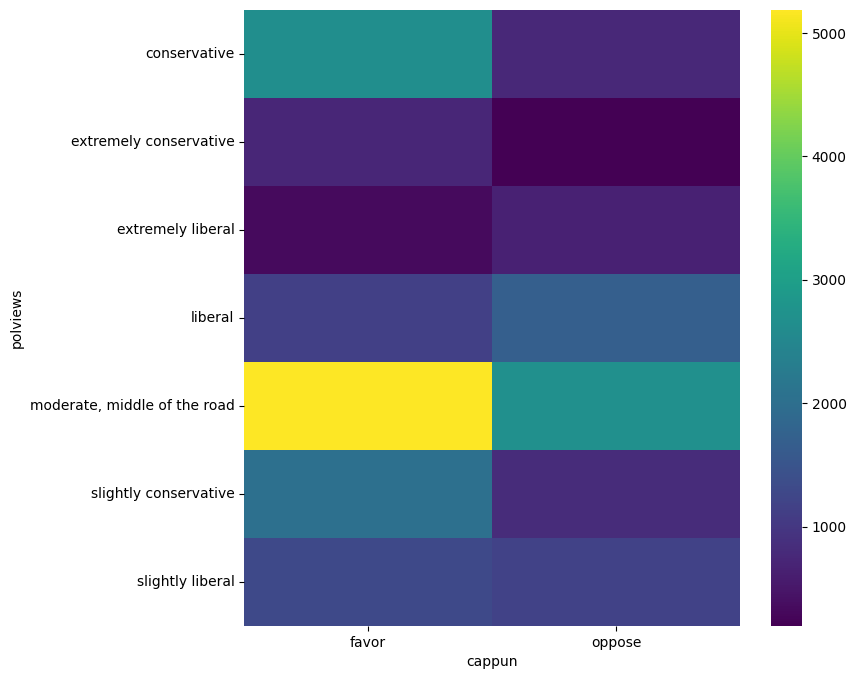

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['polviews'].value_counts()
    for x_label, grp in df.groupby('cappun')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cappun')
_ = plt.ylabel('polviews')

The heatmap above

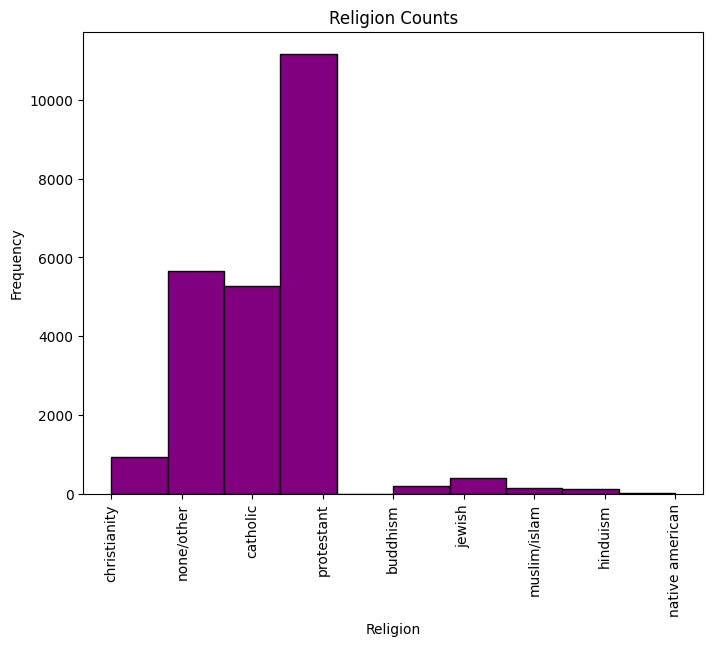

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['relig'].hist(color='purple', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.title('Religion Counts')
plt.grid(False)
plt.show()

The histogram above shows the frequncy of the different religions appearing in the data set. Overall, it is evident that the majority of the population in this data set is protestant, with those selecting none/other and catholic being the second and third most chosen religions, respectively. Other religions, such as native american, hinduism, and muslim/islam had a much smaller frequency throughout this data set. As a result of the frequncies amoung populations being skewed, the responses might not be applicable to the larger population in those religions with few respondents.

**Concluding** **Remarks**

Analyzing the capital punishment variable along with several other variables with a high likelihood of having a strong correlation to capital punishment produced some very important results. We found that as a generalization across the board, individuals had a stronger tendency to favor capital punishment for each religious group and age group.